# Rf 3 0 4_Uncorrprod
Multidimensional models: simple uncorrelated multi-dimensional p.d.f.s

pdf = gauss(x,mx,sx) * gauss(y,my,sy)




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:47 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create component pdfs in x and y
----------------------------------------------------------------

Create two p.d.f.s gaussx(x,meanx,sigmax) gaussy(y,meany,sigmay) and its
variables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)

meanx = ROOT.RooRealVar("mean1", "mean of gaussian x", 2)
meany = ROOT.RooRealVar("mean2", "mean of gaussian y", -2)
sigmax = ROOT.RooRealVar("sigmax", "width of gaussian x", 1)
sigmay = ROOT.RooRealVar("sigmay", "width of gaussian y", 5)

gaussx = ROOT.RooGaussian("gaussx", "gaussian PDF", x, meanx, sigmax)
gaussy = ROOT.RooGaussian("gaussy", "gaussian PDF", y, meany, sigmay)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Construct uncorrelated product pdf
-------------------------------------------------------------------

Multiply gaussx and gaussy into a two-dimensional p.d.f. gaussxy

In [3]:
gaussxy = ROOT.RooProdPdf(
    "gaussxy", "gaussx*gaussy", ROOT.RooArgList(gaussx, gaussy))

Sample pdf, plot projection on x and y
---------------------------------------------------------------------------

Generate 10000 events in x and y from gaussxy

In [4]:
data = gaussxy.generate(ROOT.RooArgSet(x, y), 10000)

Plot x distribution of data and projection of gaussxy x = Int(dy)
gaussxy(x,y)

In [5]:
xframe = x.frame(ROOT.RooFit.Title("X projection of gauss(x)*gauss(y)"))
data.plotOn(xframe)
gaussxy.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_55685607efb0") at 0x55685607efb0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(gaussxy) plot on x integrates over variables (y)


Plot x distribution of data and projection of gaussxy y = Int(dx)
gaussxy(x,y)

In [6]:
yframe = y.frame(ROOT.RooFit.Title("Y projection of gauss(x)*gauss(y)"))
data.plotOn(yframe)
gaussxy.plotOn(yframe)

<ROOT.RooPlot object ("frame_y_55685639dff0") at 0x55685639dff0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(gaussxy) plot on y integrates over variables (x)


Make canvas and draw ROOT.RooPlots

In [7]:
c = ROOT.TCanvas("rf304_uncorrprod", "rf304_uncorrprod", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
yframe.GetYaxis().SetTitleOffset(1.4)
yframe.Draw()

c.SaveAs("rf304_uncorrprod.png")

Info in <TCanvas::Print>: png file rf304_uncorrprod.png has been created


Draw all canvases 

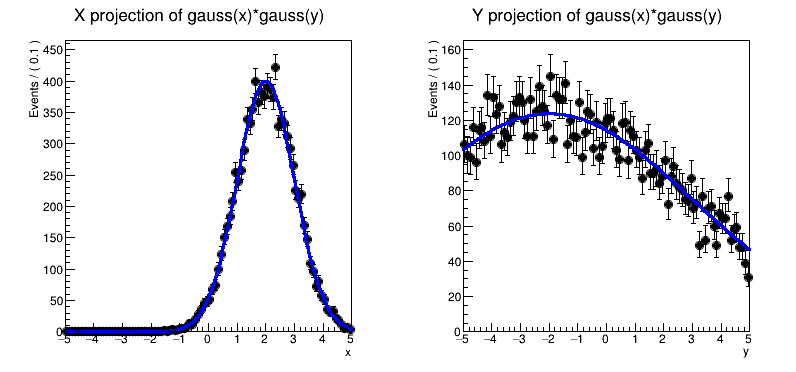

In [8]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()